## Golden Task

# Task 1:- Covid 19 Analysis

### By: Shweta Kulkarni

In [1]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [2]:
# Load the dataset
data=pd.read_csv("Covid Data.csv")
pd.set_option("display.max_columns",None)

## Domain Analysis

In the Boolean features, 1 means "yes" and 2 means "no" and values as 97 and 99 are missing data.

* USMER -Indicates whether the patient treated medical units of the first, second or third level.
* MEDICAL_UNIT- Type of institution of the National Health System that provided the care.
* SEX - 1-female. 2-male
* PATIENT_TYPE - Type of care the patient received in the unit. 1 for returned home and 2 for hospitalization.
* DATE_DIED - If the patient died indicate the date of death, and 9999-99-99 otherwise.
* INTUBED - Whether the patient was connected to the ventilator.
* PNEUMONIA - Whether the patient already have air sacs inflammation or not.
* AGE - Age of the patient.
* PREGNANT - Whether the patient is pregnant or not.
* DIABETES - Whether the patient has diabetes or not
* COPD - Whether the patient has Chronic obstructive pulmonary disease or not
* ASTHMA - Whether the patient has asthma or not
* INMSUPR - Whether the patient is immunosuppressed or not.
* HIPERTENSION - Whether the patient has hypertension or not
* OTHER_DISEASE - Whether the patient has other disease or not
* CARDIOVASCULAR - Whether the patient has heart or blood vessels related disease
* OBESITY- Whether the patient is obese or not
* RENAL_CHRONIC - Whether the patient has chronic renal disease or not
* TOBACCO - Whether the patient is a tobacco user
* CLASIFFICATION_FINAL - Covid test results. covid test findings. Values 1-3 mean that the patient was diagnosed with covid in different degrees. 4 or higher means that the patient is not a carrier of covid or that the test is inconclusive.
* ICU - Whether the patient had been admitted to an Intensive Care Unit

## Basic Checks

In [3]:
# First five rows
data.head()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97


In [4]:
# Last five rows
data.tail()

,USMER,MEDICAL_UNIT,SEX,PATIENT_TYPE,DATE_DIED,INTUBED,PNEUMONIA,AGE,PREGNANT,DIABETES,COPD,ASTHMA,INMSUPR,HIPERTENSION,OTHER_DISEASE,CARDIOVASCULAR,OBESITY,RENAL_CHRONIC,TOBACCO,CLASIFFICATION_FINAL,ICU
1048570,2,13,2,1,9999-99-99,97,2,40,97,2,2,2,2,2,2,2,2,2,2,7,97
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97
1048573,2,13,2,1,9999-99-99,97,2,28,97,2,2,2,2,2,2,2,2,2,2,7,97
1048574,2,13,2,1,9999-99-99,97,2,52,97,2,2,2,2,2,2,2,2,2,2,7,97


In [5]:
# Shape of data
data.shape

(1048575, 21)

In [6]:
# Columns in data
data.columns

Index(['USMER', 'MEDICAL_UNIT', 'SEX', 'PATIENT_TYPE', 'DATE_DIED', 'INTUBED',
       'PNEUMONIA', 'AGE', 'PREGNANT', 'DIABETES', 'COPD', 'ASTHMA', 'INMSUPR',
       'HIPERTENSION', 'OTHER_DISEASE', 'CARDIOVASCULAR', 'OBESITY',
       'RENAL_CHRONIC', 'TOBACCO', 'CLASIFFICATION_FINAL', 'ICU'],
      dtype='object')

In [7]:
# Coverting the Name of Columns to lower Case
data.columns = [col.lower() for col in data.columns]
data.columns

Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'date_died', 'intubed',
       'pneumonia', 'age', 'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hipertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'clasiffication_final', 'icu'],
      dtype='object')

In [8]:
# Information of data
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 21 columns):
 #   Column                Non-Null Count    Dtype 
---  ------                --------------    ----- 
 0   usmer                 1048575 non-null  int64 
 1   medical_unit          1048575 non-null  int64 
 2   sex                   1048575 non-null  int64 
 3   patient_type          1048575 non-null  int64 
 4   date_died             1048575 non-null  object
 5   intubed               1048575 non-null  int64 
 6   pneumonia             1048575 non-null  int64 
 7   age                   1048575 non-null  int64 
 8   pregnant              1048575 non-null  int64 
 9   diabetes              1048575 non-null  int64 
 10  copd                  1048575 non-null  int64 
 11  asthma                1048575 non-null  int64 
 12  inmsupr               1048575 non-null  int64 
 13  hipertension          1048575 non-null  int64 
 14  other_disease         1048575 non-null  int64 
 15

In [9]:
# Statistics of data
data.describe()

,usmer,medical_unit,sex,patient_type,intubed,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
count,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06,1.048575e+06
mean,1.632194e+00,8.980565e+00,1.499259e+00,1.190765e+00,7.952288e+01,3.346831e+00,4.179410e+01,4.976558e+01,2.186404e+00,2.260569e+00,2.242626e+00,2.298132e+00,2.128989e+00,2.435143e+00,2.261810e+00,2.125176e+00,2.257180e+00,2.214333e+00,5.305653e+00,7.955397e+01
std,4.822084e-01,3.723278e+00,4.999997e-01,3.929041e-01,3.686889e+01,1.191288e+01,1.690739e+01,4.751073e+01,5.424242e+00,5.132258e+00,5.114089e+00,5.462843e+00,5.236397e+00,6.646676e+00,5.194850e+00,5.175445e+00,5.135354e+00,5.323097e+00,1.881165e+00,3.682307e+01
min,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00
25%,1.000000e+00,4.000000e+00,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,3.000000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,3.000000e+00,9.700000e+01
50%,2.000000e+00,1.200000e+01,1.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,4.000000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,6.000000e+00,9.700000e+01
75%,2.000000e+00,1.200000e+01,2.000000e+00,1.000000e+00,9.700000e+01,2.000000e+00,5.300000e+01,9.700000e+01,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,2.000000e+00,7.000000e+00,9.700000e+01
max,2.000000e+00,1.300000e+01,2.000000e+00,2.000000e+00,9.900000e+01,9.900000e+01,1.210000e+02,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,9.800000e+01,7.000000e+00,9.900000e+01


In [10]:
# Statistics of data for categorical 
data.describe(include="O").T

,count,unique,top,freq
date_died,1048575,401,9999-99-99,971633


In [11]:
# Check missing values
data.isnull().sum()

usmer                   0
medical_unit            0
sex                     0
patient_type            0
date_died               0
intubed                 0
pneumonia               0
age                     0
pregnant                0
diabetes                0
copd                    0
asthma                  0
inmsupr                 0
hipertension            0
other_disease           0
cardiovascular          0
obesity                 0
renal_chronic           0
tobacco                 0
clasiffication_final    0
icu                     0
dtype: int64

* No missing values present.

## Data preprocessing

In [12]:
# Checking Duplicate values
data.duplicated().sum()

812049

In [13]:
# Dropping Duplicated values
data=data.drop_duplicates()
data

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1048568,1,13,2,1,9999-99-99,97,2,47,97,1,2,2,2,2,2,2,2,2,2,7,97
1048569,1,13,1,2,9999-99-99,2,2,56,2,1,2,2,2,2,2,2,2,2,2,7,2
1048571,1,13,2,2,9999-99-99,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
1048572,2,13,2,1,9999-99-99,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97


In [14]:
## Resetting Index
data.reset_index(drop=True,inplace=True)
data

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu
0,2,1,1,1,03/05/2020,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97
1,2,1,2,1,03/06/2020,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97
2,2,1,2,2,09/06/2020,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2
3,2,1,1,1,12/06/2020,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97
4,2,1,2,1,21/06/2020,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
236521,1,13,2,1,9999-99-99,97,2,47,97,1,2,2,2,2,2,2,2,2,2,7,97
236522,1,13,1,2,9999-99-99,2,2,56,2,1,2,2,2,2,2,2,2,2,2,7,2
236523,1,13,2,2,9999-99-99,2,2,51,97,2,2,2,2,1,2,2,2,2,2,7,2
236524,2,13,2,1,9999-99-99,97,2,55,97,2,2,2,2,2,2,2,2,2,2,7,97


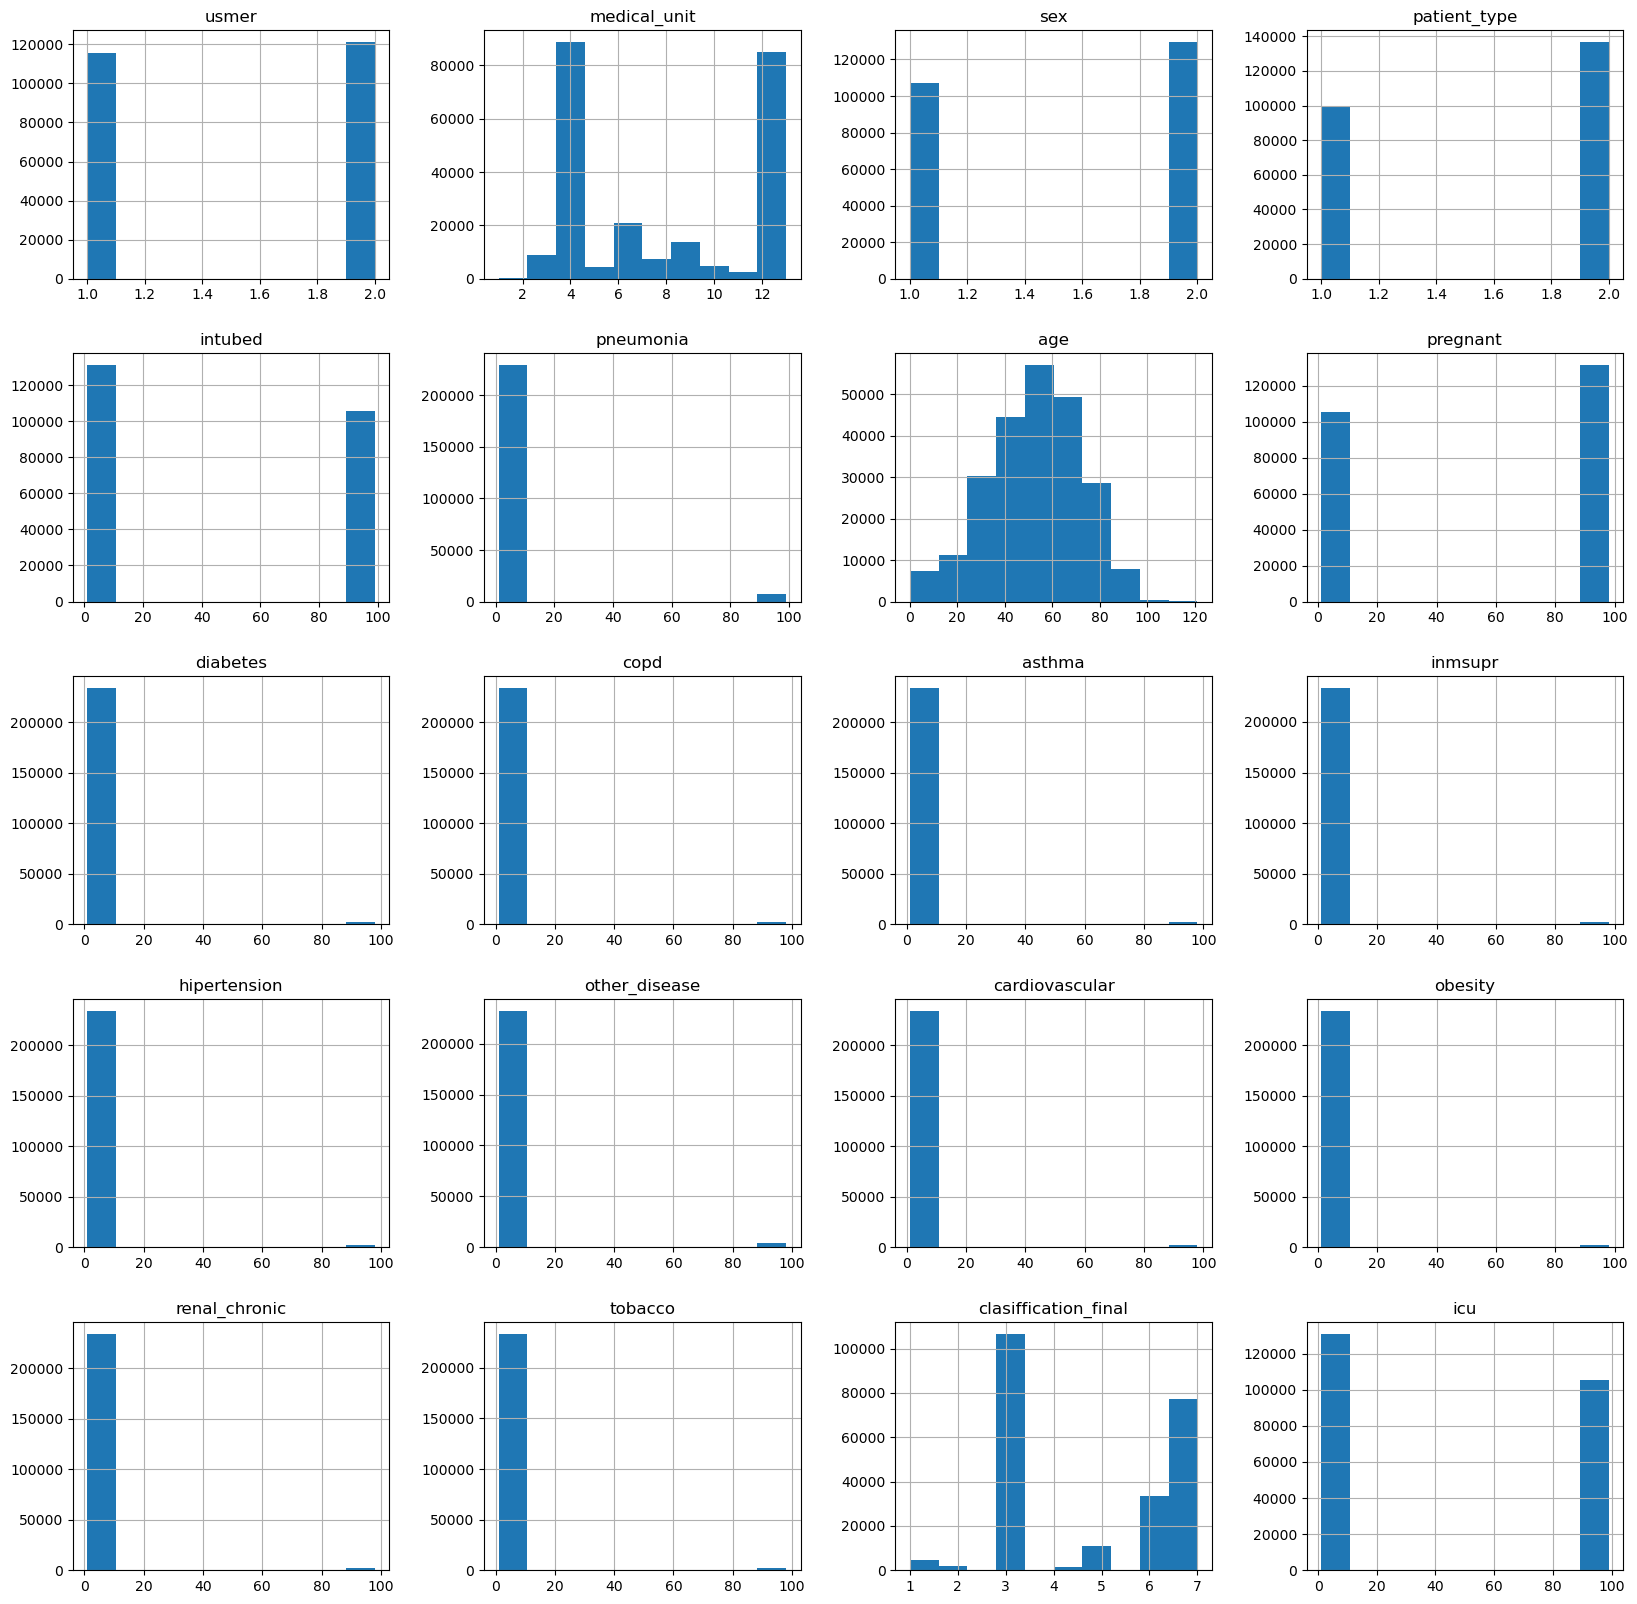

In [15]:
# plotting all numerical columns using histogram
data.hist(figsize=(20,20))
plt.show()

In [16]:
# Finding unique values in all columns
data.apply(np.unique)

usmer                                                              [1, 2]
medical_unit                  [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13]
sex                                                                [1, 2]
patient_type                                                       [1, 2]
date_died               [01/01/2021, 01/02/2020, 01/02/2021, 01/03/202...
intubed                                                    [1, 2, 97, 99]
pneumonia                                                      [1, 2, 99]
age                     [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...
pregnant                                                   [1, 2, 97, 98]
diabetes                                                       [1, 2, 98]
copd                                                           [1, 2, 98]
asthma                                                         [1, 2, 98]
inmsupr                                                        [1, 2, 98]
hipertension                          

#### Finding missing values in the columns

In [17]:
# count of missing values with 97
data[data==97.0].count()

usmer                        0
medical_unit                 0
sex                          0
patient_type                 0
date_died                    0
intubed                  99882
pneumonia                    0
age                        121
pregnant                129503
diabetes                     0
copd                         0
asthma                       0
inmsupr                      0
hipertension                 0
other_disease                0
cardiovascular               0
obesity                      0
renal_chronic                0
tobacco                      0
clasiffication_final         0
icu                      99882
dtype: int64

In [18]:
# count of missing values with 98
data[data==98.0].count()

usmer                      0
medical_unit               0
sex                        0
patient_type               0
date_died                  0
intubed                    0
pneumonia                  0
age                      103
pregnant                1954
diabetes                2840
copd                    2529
asthma                  2506
inmsupr                 2926
hipertension            2620
other_disease           4362
cardiovascular          2603
obesity                 2554
renal_chronic           2531
tobacco                 2738
clasiffication_final       0
icu                        0
dtype: int64

In [19]:
# count of missing values with 99
data[data == 99.0].count()

usmer                      0
medical_unit               0
sex                        0
patient_type               0
date_died                  0
intubed                 5505
pneumonia               7187
age                       84
pregnant                   0
diabetes                   0
copd                       0
asthma                     0
inmsupr                    0
hipertension               0
other_disease              0
cardiovascular             0
obesity                    0
renal_chronic              0
tobacco                    0
clasiffication_final       0
icu                     5654
dtype: int64

#### Data Cleaning

#### 1. date_died Column

In [20]:
# Counting values of 'date_died' column
data['date_died'].value_counts() 

9999-99-99    160561
07/07/2020       984
06/07/2020       980
13/07/2020       970
16/06/2020       960
               ...  
24/11/2020         1
17/12/2020         1
08/12/2020         1
16/03/2021         1
22/04/2021         1
Name: date_died, Length: 401, dtype: int64

In [21]:
# data cleaning in date-died column
data.date_died[data['date_died'] != '9999-99-99'] = 'Died'
data.date_died[data['date_died'] == '9999-99-99'] = 'Alive'
data.date_died.value_counts()

Alive    160561
Died      75965
Name: date_died, dtype: int64

In [22]:
# Adding a new column 'death'
data['death'] = data.date_died
data.head()

,usmer,medical_unit,sex,patient_type,date_died,intubed,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco,clasiffication_final,icu,death
0,2,1,1,1,Died,97,1,65,2,2,2,2,2,1,2,2,2,2,2,3,97,Died
1,2,1,2,1,Died,97,1,72,97,2,2,2,2,1,2,2,1,1,2,5,97,Died
2,2,1,2,2,Died,1,2,55,97,1,2,2,2,2,2,2,2,2,2,3,2,Died
3,2,1,1,1,Died,97,2,53,2,2,2,2,2,2,2,2,2,2,2,7,97,Died
4,2,1,2,1,Died,97,2,68,97,1,2,2,2,1,2,2,2,2,2,3,97,Died


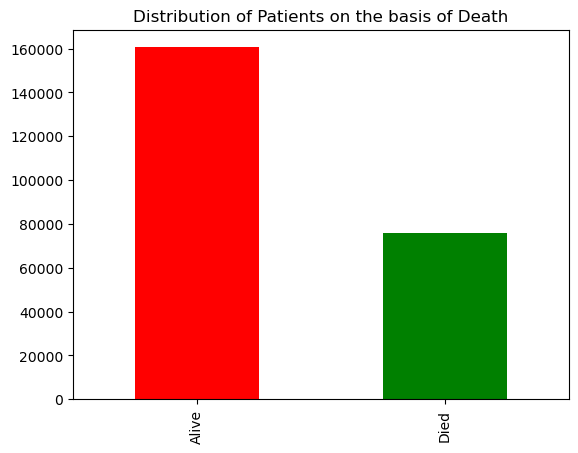

In [23]:
# Plotting Barplot for date-died Column to check the ratio of people on the basis of their death
data['date_died'].value_counts().plot(kind='bar',color=('red','green'), title = 'Distribution of Patients on the basis of Death')
plt.show()

In [24]:
# dropping date_died column
data.drop(['date_died'],axis=1,inplace=True)
data.columns

Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'intubed', 'pneumonia',
       'age', 'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr',
       'hipertension', 'other_disease', 'cardiovascular', 'obesity',
       'renal_chronic', 'tobacco', 'clasiffication_final', 'icu', 'death'],
      dtype='object')

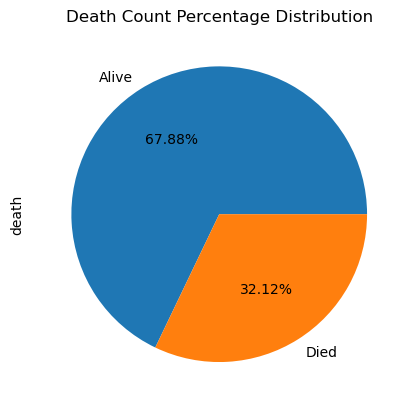

In [25]:
# Plotting percentage distribution of death. 
data['death'].value_counts().plot(kind='pie',autopct='%.2f%%',title="Death Count Percentage Distribution")
plt.show()

#### 2. Sex Column

In [26]:
# counting values of sex column
data['sex'].value_counts()

2    129503
1    107023
Name: sex, dtype: int64

In [27]:
# Replacing the values
data['sex'].replace({1:'female',2:'male'},inplace=True)
data['sex'].value_counts()

male      129503
female    107023
Name: sex, dtype: int64

#### 3. Pregnant Column

In [28]:
# counting values of pregnant column
data['pregnant'].value_counts()

97    129503
2     102049
1       3020
98      1954
Name: pregnant, dtype: int64

In [29]:
data.groupby(['sex','pregnant'])[['sex']].count()

sex
sex    pregnant        
female 1           3020
       2         102049
       98          1954
male   97        129503

In [30]:
# Replacing values in the pregnant column
data['pregnant'].replace({97 : 2, 98 : np.nan},inplace=True)
data['pregnant'].value_counts()

2.0    231552
1.0      3020
Name: pregnant, dtype: int64

In [31]:
# Checking null values in the pregnant column 
data['pregnant'].isna().sum()

1954

#### 4. Patient_type Column

In [32]:
# counting values of 'patient_type' column
data['patient_type'].value_counts()

2    136644
1     99882
Name: patient_type, dtype: int64

In [33]:
# data cleaning in 'patient_type' column
data['patient_type'].replace({1: 'Not Hospitalized',2: 'Hospitalized'},inplace=True)
data['patient_type'].value_counts()  

Hospitalized        136644
Not Hospitalized     99882
Name: patient_type, dtype: int64

In [34]:
data.groupby(['patient_type','intubed'])[['patient_type']].count()

patient_type
patient_type     intubed              
Hospitalized     1               32295
                 2               98844
                 99               5505
Not Hospitalized 97              99882

In [35]:
data.groupby(['patient_type','icu'])[['patient_type']].count()

patient_type
patient_type     icu              
Hospitalized     1           15383
                 2          115607
                 99           5654
Not Hospitalized 97          99882

#### 5. Clasiffication_final Column

In [36]:
# counting values of 'clasiffication_final' column
data['clasiffication_final'].value_counts()

3    106712
7     77075
6     33629
5     10900
1      4730
2      1846
4      1634
Name: clasiffication_final, dtype: int64

In [37]:
# data cleaning in clasiffication_final column
data['clasiffication_final'] = np.where(
    data['clasiffication_final'] >= 4, 'Carrier or inconclusive', data['clasiffication_final'])

In [38]:
# checking unique values of clasiffication_final Column
data['clasiffication_final'].unique()

array(['3', 'Carrier or inconclusive', '1', '2'], dtype=object)

#### Replacing all the missing values into null values

In [39]:
# replacing all the missing values into nan values
data.replace([97,98,99], np.nan , inplace=True)     

In [40]:
data.isnull().sum()

usmer                        0
medical_unit                 0
sex                          0
patient_type                 0
intubed                 105387
pneumonia                 7187
age                        308
pregnant                  1954
diabetes                  2840
copd                      2529
asthma                    2506
inmsupr                   2926
hipertension              2620
other_disease             4362
cardiovascular            2603
obesity                   2554
renal_chronic             2531
tobacco                   2738
clasiffication_final         0
icu                     105536
death                        0
dtype: int64

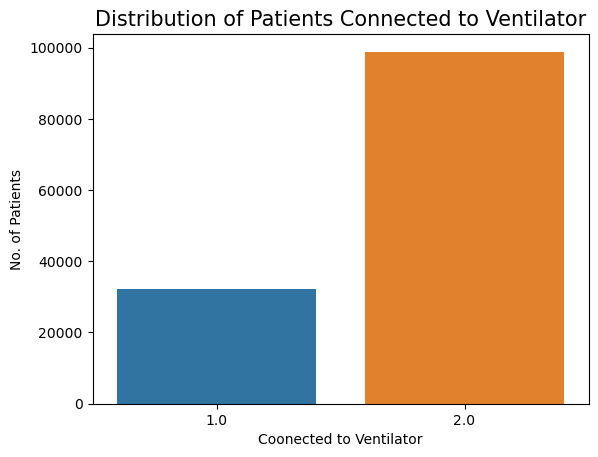

In [41]:
sns.countplot(x=data['intubed'])
plt.title('Distribution of Patients Connected to Ventilator', fontsize = 15)
plt.xlabel('Coonected to Ventilator')
plt.ylabel('No. of Patients')
plt.show()

* This plot shows 2 is more than 1 which means less no. of patients are connected to ventilator.

In [42]:
# Showing Distribution of Patients admitted to ICU
data['icu'].value_counts()

2.0    115607
1.0     15383
Name: icu, dtype: int64

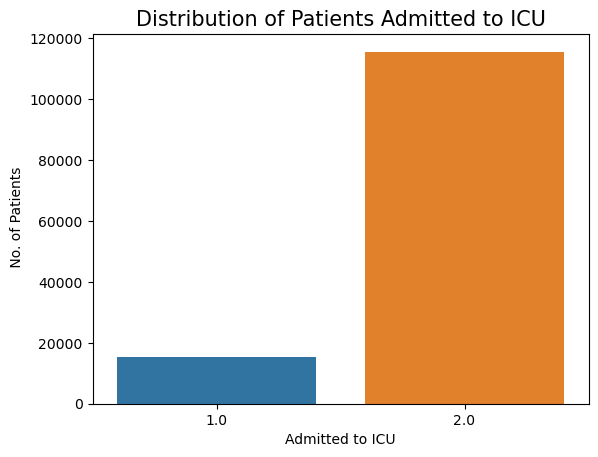

In [43]:
sns.countplot(x= data['icu'])
plt.title('Distribution of Patients Admitted to ICU',fontsize=15)
plt.xlabel('Admitted to ICU')
plt.ylabel(' No. of Patients')
plt.show()

* This plot shows 2 is more than 1 which implies that only 15383 patients are admitted in the ICU out of 130990 patients

In [44]:
# There are so many null values in ICU and intubed column so we are going to drop these two columns.
data.drop(columns=["intubed","icu"], inplace=True)
data.columns

Index(['usmer', 'medical_unit', 'sex', 'patient_type', 'pneumonia', 'age',
       'pregnant', 'diabetes', 'copd', 'asthma', 'inmsupr', 'hipertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic',
       'tobacco', 'clasiffication_final', 'death'],
      dtype='object')

#### Dropping Null Values

In [45]:
# Dropping null values
data = data.dropna(how='any',axis = 0)
data.isnull().sum()

usmer                   0
medical_unit            0
sex                     0
patient_type            0
pneumonia               0
age                     0
pregnant                0
diabetes                0
copd                    0
asthma                  0
inmsupr                 0
hipertension            0
other_disease           0
cardiovascular          0
obesity                 0
renal_chronic           0
tobacco                 0
clasiffication_final    0
death                   0
dtype: int64

In [46]:
# Statistical Information of all the numerical columns
data.describe()

,usmer,medical_unit,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
count,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000,220852.000000
mean,1.525230,7.536672,1.560828,53.063373,1.987376,1.678255,1.939661,1.931873,1.947046,1.616684,1.915405,1.922142,1.726527,1.925244,1.859639
std,0.499364,3.649664,0.496287,19.019905,0.111645,0.467147,0.238114,0.251964,0.223942,0.486195,0.278279,0.267948,0.445742,0.262998,0.347362
min,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,1.000000,4.000000,1.000000,40.000000,2.000000,1.000000,2.000000,2.000000,2.000000,1.000000,2.000000,2.000000,1.000000,2.000000,2.000000
50%,2.000000,6.000000,2.000000,54.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
75%,2.000000,12.000000,2.000000,67.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000
max,2.000000,13.000000,2.000000,121.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000


In [47]:
# information of categorical columns
data.describe(include='O')

,sex,patient_type,clasiffication_final,death
count,220852,220852,220852,220852
unique,2,2,4,2
top,male,Hospitalized,Carrier or inconclusive,Alive
freq,122330,129810,111036,147274


## Data Visualization

#### Sex Column

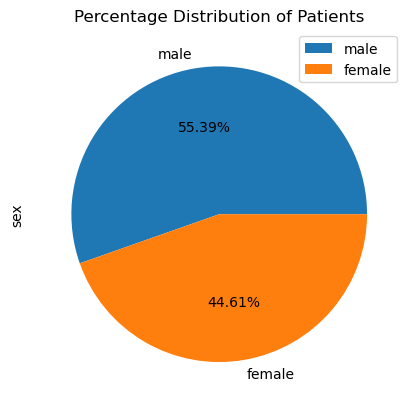

In [48]:
data['sex'].value_counts().plot(kind='pie' , autopct = '%.2f%%',title='Percentage Distribution of Patients')
plt.legend(data['sex'].value_counts().index)
plt.show()

* This Plot Shows the percentage male contains the larger part which is around 55.39% than females which is around 44.61%

#### Sex Wise Distribution of Patients on the basis of Death.

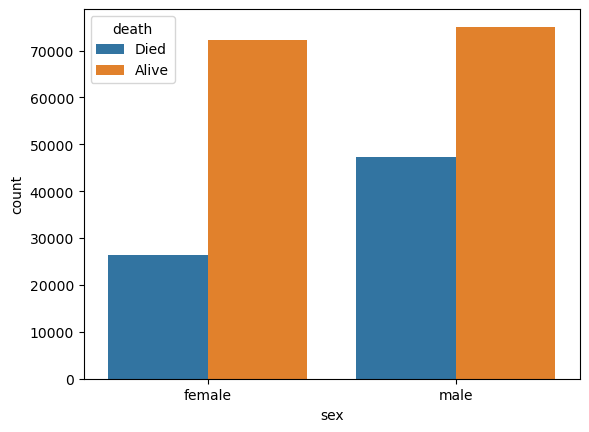

In [49]:
sns.countplot(data=data , x = 'sex', hue= 'death')
plt.show()

* This Plot clearly shows that rate of male in terms of death is higher than females which implies more males were died as compraed to females.

#### sex wise Distribution of Patients on the basis of Patient_type

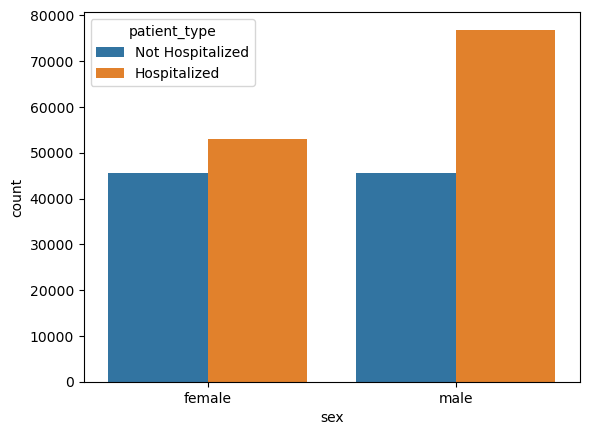

In [50]:
sns.countplot(data = data , x = 'sex' , hue = 'patient_type')
plt.show()

* This plot clearly Shows that more males are hospitalized as compared to females in the Covid Period.

#### Average Distribution of Different Diseases Sex Wise

In [51]:
d1 = data.groupby(['sex'])[['pneumonia','diabetes','copd','asthma','inmsupr','hipertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic']].mean()
d1

,pneumonia,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic
sex,,,,,,,,,,
female,1.606961,1.667587,1.934624,1.910051,1.938440,1.598171,1.901423,1.921175,1.702452,1.925174
male,1.523674,1.686847,1.943718,1.949448,1.953977,1.631595,1.926666,1.922922,1.745917,1.925300


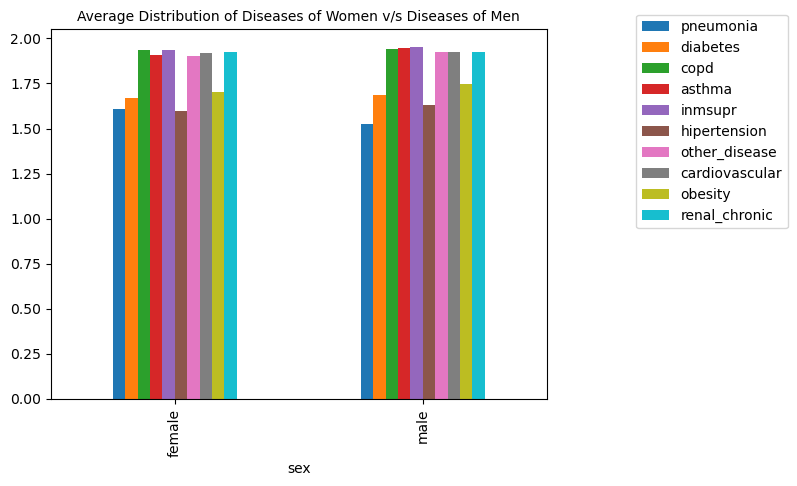

In [52]:
d1.plot(kind = 'bar')
plt.title('Average Distribution of Diseases of Women v/s Diseases of Men', fontsize=10)
plt.legend(loc='right', bbox_to_anchor=(1,0.5,0.5,0.5))
plt.show()

This plot clearly shows :-

* Pneumonia - Female Patients are more than Male Patients
* Diabetes - Male are more diabetic than Females
* copd - Ratio of Males for Chronic obstructive pulmonary disease a bit more than Females.
* Asthama - Male Patients are more than Female ones.
* inmsupr - Males are more immunosuppressed than females
* Hypertension - Male Patients are more than females
* Other_Diseases - Male Patients are more than Females
* Cardiovascular - Male Patients are Equal to Female Patients
* Obesity - Male are more Obese than Females
* Renal_Chronic - Male Patients are equal to Female Patients

#### Age Distribution

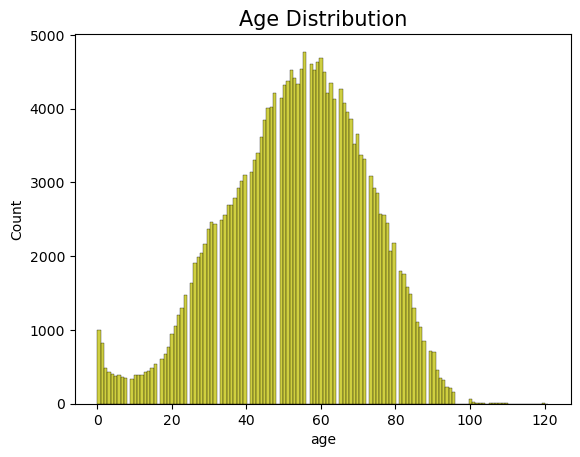

In [53]:
sns.histplot(data['age'],color=('y'))
plt.title('Age Distribution', fontsize=15)
plt.show()

* Patients are Roughly Between 20 - 60 Years Old

#### Age Distribution Death Wise

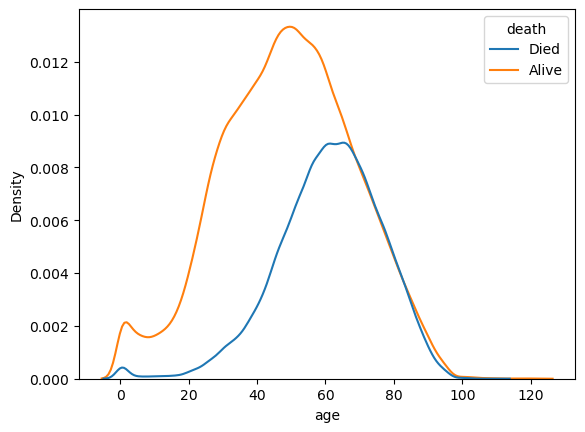

In [54]:
sns.kdeplot(x ='age', hue = 'death',data = data,)
plt.show()

* It is clearly shown from this plot that Older Patients re more likely to die compare to younger ones.

#### Age Distribution Patient_type wise

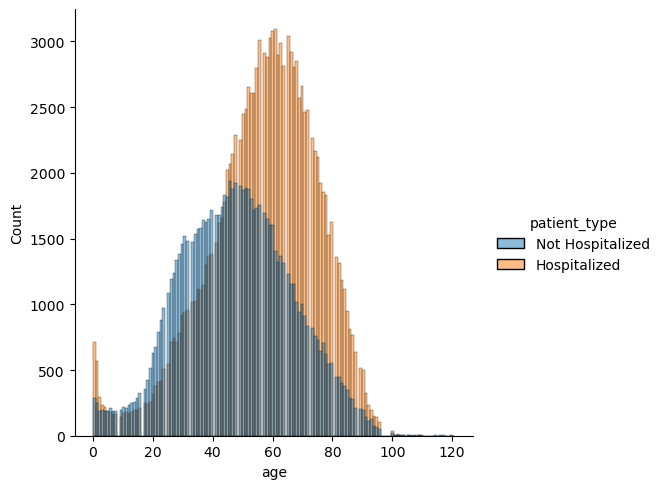

In [55]:
sns.displot(data = data , x = 'age' , hue = 'patient_type')
plt.show()

* This plot clearly shows that patients ranging between 40-60 ages are more hospitalized

#### Distribution of Patients Consuming Tobacco Age wise

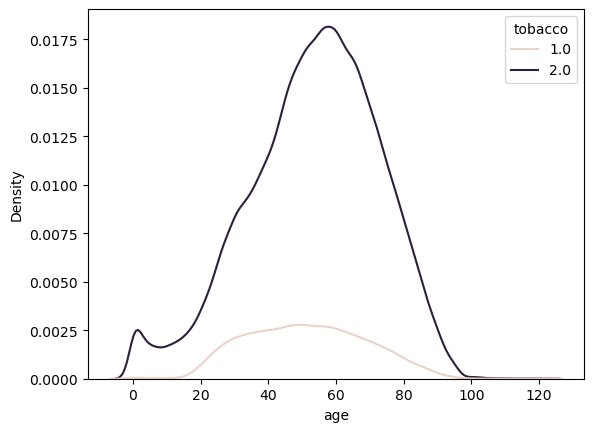

In [56]:
sns.kdeplot(data = data, x = 'age', hue = 'tobacco')
plt.show()

* This plot Shows Age range between 30-70 Consumes more tobacco.

#### Death Column

In [57]:
# Sex and Death Wise Average Distribution of Different Diseases.

d2 = data.groupby(['death','sex'])[['pneumonia','diabetes','asthma','hipertension',
       'other_disease', 'cardiovascular', 'obesity', 'renal_chronic','copd','inmsupr']].mean()
d2

pneumonia  diabetes    asthma  hipertension  other_disease  \
death sex                                                                  
Alive female   1.718584  1.701877  1.887788      1.632486       1.891709   
      male     1.669632  1.705829  1.926674      1.640866       1.913982   
Died  female   1.301021  1.573604  1.971067      1.504120       1.928048   
      male     1.291675  1.656675  1.985648      1.616858       1.946826   

              cardiovascular   obesity  renal_chronic      copd   inmsupr  
death sex                                                                  
Alive female        1.915481  1.689409       1.929584  1.934252  1.931357  
      male          1.909188  1.717722       1.921640  1.936782  1.943361  
Died  female        1.936781  1.738201       1.913088  1.935642  1.957854  
      male          1.944751  1.790733       1.931119  1.954743  1.970852

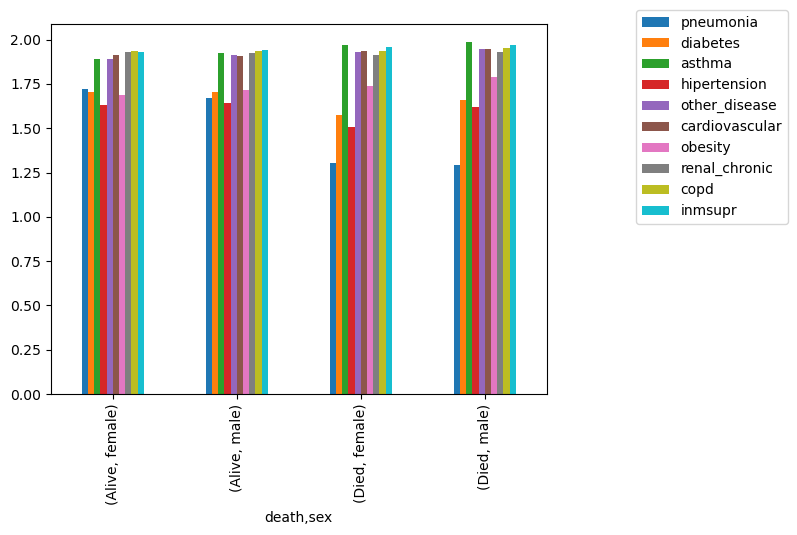

In [58]:
d2.plot(kind='bar')
plt.legend(loc='right' , bbox_to_anchor = (1,0.5,0.5,0.5))
plt.show()

#### Tobacco Column

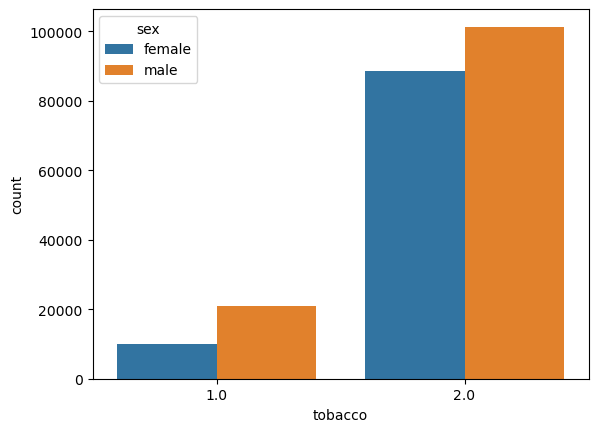

In [59]:
# Distribution of Patients Consuming Tobacco Gender wise

# 1 implies Yes and 2 implies No

sns.countplot(data = data , x = 'tobacco', hue= 'sex')
plt.show()

* This plot clearly shows there are very few Female Patients who are consuming Tobacco than Males.

#### Patient_type Column

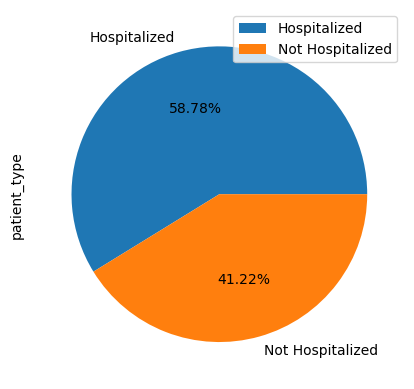

In [60]:
# Patient_Type Count Distribution

data['patient_type'].value_counts().plot(kind='pie' , autopct = '%.2f%%')
plt.legend(data['patient_type'].value_counts().index)
plt.show()

* This Plot Shows 58.78% of Patients are hospitalized

#### Clasiffication_final Column

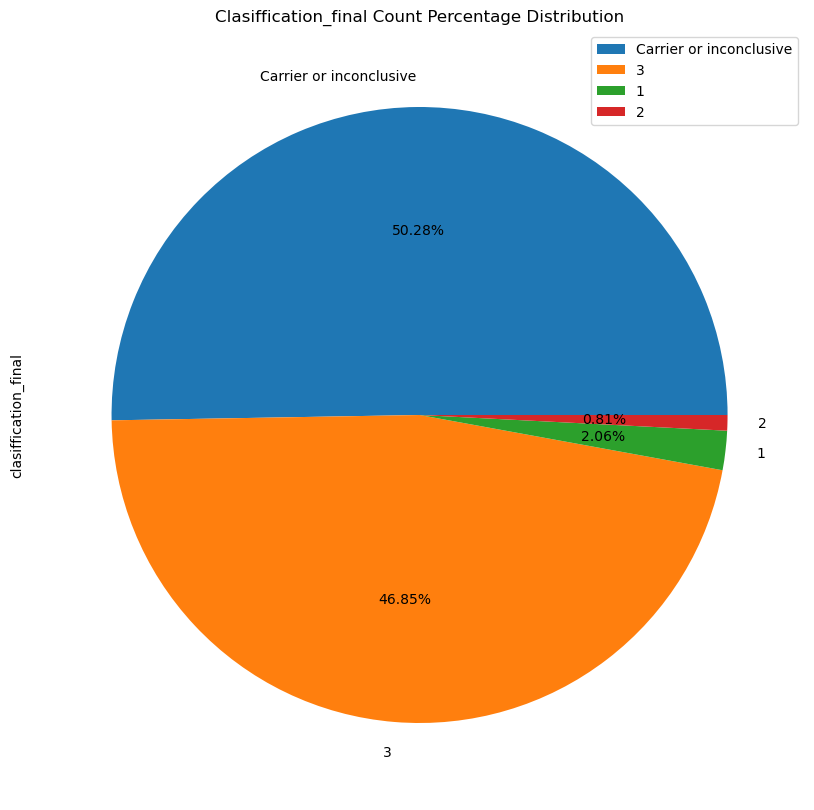

In [61]:
plt.figure(figsize=(10,10))
data['clasiffication_final'].value_counts().plot(kind='pie',autopct='%.2f%%')
plt.title('Clasiffication_final Count Percentage Distribution')
plt.legend(data['clasiffication_final'].value_counts().index)
plt.show()

* This Plot shows more than 50 % of the patients were not covid carrier.

In [62]:
# showing the correlation table
corr = data.corr()
corr 

,usmer,medical_unit,pneumonia,age,pregnant,diabetes,copd,asthma,inmsupr,hipertension,other_disease,cardiovascular,obesity,renal_chronic,tobacco
usmer,1.000000,0.033314,0.095318,-0.038204,-0.010774,0.022434,-0.003648,-0.014841,-0.014513,0.020829,-0.008509,-0.012104,-0.025910,0.021463,-0.023295
medical_unit,0.033314,1.000000,-0.048240,-0.071780,-0.023367,0.019020,-0.009620,-0.032410,-0.008491,0.054757,0.078402,-0.029475,-0.030360,0.033160,-0.033069
pneumonia,0.095318,-0.048240,1.000000,-0.179875,-0.060098,0.065355,-0.009135,-0.119340,-0.037160,0.033824,-0.060295,-0.037372,-0.030552,-0.006755,-0.070389
age,-0.038204,-0.071780,-0.179875,1.000000,0.140501,-0.217863,-0.162789,0.126060,0.061037,-0.295622,0.058353,-0.086763,0.052287,-0.031521,0.036315
pregnant,-0.010774,-0.023367,-0.060098,0.140501,1.000000,-0.059820,-0.024735,-0.000634,-0.011525,-0.071044,0.012847,-0.026952,-0.024607,-0.027822,-0.027943
diabetes,0.022434,0.019020,0.065355,-0.217863,-0.059820,1.000000,0.040927,-0.053509,-0.008951,0.280267,-0.045460,0.049074,0.045982,0.129213,-0.027535
copd,-0.003648,-0.009620,-0.009135,-0.162789,-0.024735,0.040927,1.000000,0.018123,0.019813,0.073136,-0.003917,0.072776,0.004808,0.020954,0.070868
asthma,-0.014841,-0.032410,-0.119340,0.126060,-0.000634,-0.053509,0.018123,1.000000,0.001625,-0.035460,-0.012710,-0.007340,0.041498,-0.035380,-0.000925
inmsupr,-0.014513,-0.008491,-0.037160,0.061037,-0.011525,-0.008951,0.019813,0.001625,1.000000,-0.023117,0.113831,0.028105,-0.026276,0.078320,-0.014466
hipertension,0.020829,0.054757,0.033824,-0.295622,-0.071044,0.280267,0.073136,-0.035460,-0.023117,1.000000,-0.017017,0.129361,0.088606,0.161455,-0.020896


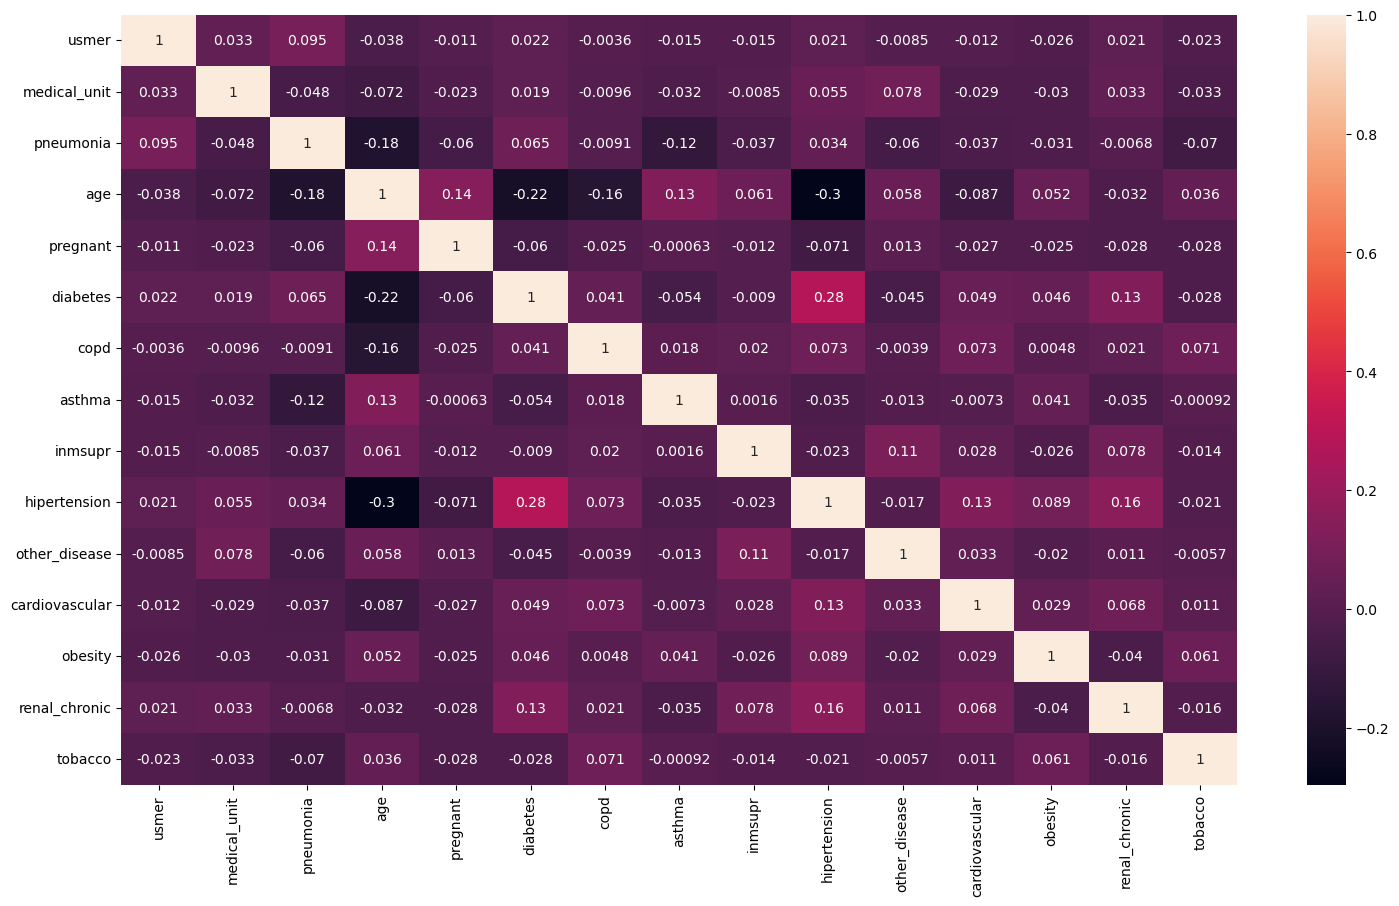

In [63]:
plt.figure(figsize=(18, 10))
sns.heatmap(data.corr(),annot=True)
plt.show()